## Convolutional Neural Networks(CNN's)
- Powerful deep networks 
that are widely used in image related tasks like-Image Recognition,Segmention,Computer Vision etc.Input to these networks are images!
            

## Why another type of Networks?

##### Problem with Multilayer Peceptron(MLP's):-
- Overfitting due to too many parameters(~millions),while working with medium-large sized images!
- Fail to handle variance in images - translation,rotion,illumination,size etc!

### Why CNN's special? 
- It's like Template Matching!
- Locate an object described by template t(x,y) in image S(x,y)
### Convolution layer?
- Convolution Layers are made up of filters
- But what are these filters?
### Code Example-
Let's go through one code example to understand "Filters" and "Convolution".
When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

#### General CNN Architectue:
- [Conv Layers-->Relu-->Pooling]-->FC-->Softmax

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
def drawImg(img,title="Image"):
    plt.syle.use("seaborn")
    plt.imshow(img)
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

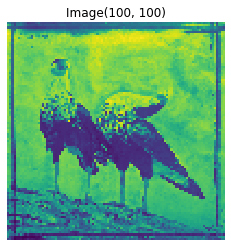

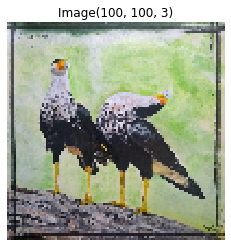

In [10]:
img_ = cv2.imread("./img.jpg")# BGR
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_ = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
drawImg(img_gray)
drawImg(img_)

In [13]:
# Hardcoded filters
def convolution(img,img_filter):
    H,W = img.shape[1],img.shape[0]
    
    F = img_filter.shape[0] #3X3
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                    
                if new_img[row][col]>255:
                    new_img[row][col]=255
                    
                if new_img[row][col]<0:
                    new_img[row][col]=0
                    
    return new_img # Activation Map
                    
                    

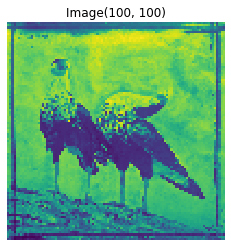

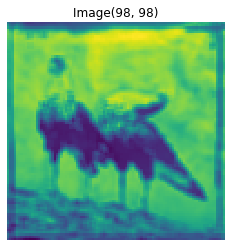

In [16]:
blur_filter = np.ones((3,3))/9.0

output1 = convolution(img_gray,blur_filter)
drawImg(img_gray)
drawImg(output1)

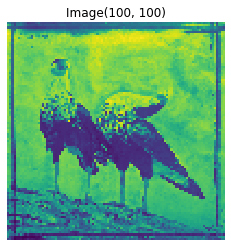

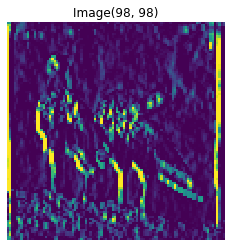

In [18]:
edge_filter = np.array(([1,0,-1],
                       [1,0,-1],
                       [1,0,-1]))

output2 = convolution(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output2)

#### Extracting features using different types of filters:-

### Convolution Layer
- Contains Various filters
- Each filter extracts different kinds of features and gives 1 activation map
- Multiple activation maps are combined by stacking to form output volume
- So CNN layer takes input a volume and produces an output volume of different shape

#### Buzzwords in CNN's
    - Convolution Layer
    - Valid vs Same Convolution
    - Pdding 
    - Stride 
    - Filters/Kernels
    - Pooling(Average/Maxpooling)

#### Stride
- Filters can have different size as well as movement
- Stride defines how a filter  should move across the image
- No of pixels we skip each time is called stride
- In our example we used a stride of (1,1) along W and H
- You can use a stride of (2,2) that case the output volume will have less W and H
#### Input and Output sizes(assuming 0 padding):
        - nH = (nHprev - f)/stride + 1
        - nW = (nWprev - f)/stride + 1
        - nC = nCprev

### Padding
- Convolution operation we have seen reduces "H" and "W" of original imahe
- But sometimes we want the output image to have same size as imput image
- So we can achieve this by adding 0 value pixels(neurons) outside the original image
- This is called Padding 
##### Input and output Sizes after Convolution(with padding):
    - nH = (nHprev - f + 2*pad)/stride + 1
    - nW = (nWprev - f + 2*pad)/stride + 1
    - nC = number of filters used in the convolution

### Padding Example(using Numpy):

(100, 100, 3)


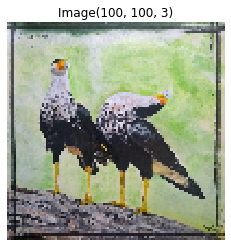

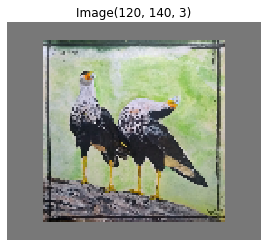

In [31]:
print(img_.shape)
drawImg(img_)

## Padding to this image

pad_img = np.pad(img_,((10,10),(20,20),(0,0)),'constant',constant_values=120)# constant_values varies(0,255)
drawImg(pad_img)    #^length   ^width  ^channel          0=black,255=white, inbetween gray


### Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling
- Max-Pooling layer: slides an (f,f) window over the input and stores the amx value of the window in the output.
- Average-Pooling layer: slides an   (f,f) window over the input and stores the average value of the window in the output.
- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)
- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as fiter size and type of pooling.

#### Implementing Pooling Operaion

In [35]:
X = np.array([[1,0,2,3],
            [4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]])

def pooling(X,mode="max"):
    
    stride = 2
    f = 2
    H,W = X.shape
    
    Ho = int((H-f)/stride)+1
    Wo = int((W-f)/stride)+1
    
    output = np.zeros((Ho,Wo))
    
    for r in range(Ho):
        for c in range(Wo):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    return output
            
            
pool_output = pooling(X)
print(pool_output)

[[6. 8.]
 [3. 4.]]


### Dropouts:Regularization
- Anything or any technique that reduces overfitting is termed as regularization

# Building a CNN using Keras
### Dataset Fashion MNIST

In [ ]:
import pandas as np
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utlis import np_utils
import matplotlib.pyplot as plt

#### Data Preparation

In [ ]:
X = pd.read_csv("./dataset/fashion-mnist.csv")
X_ = np.array(X)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) # 10 classes

In [ ]:
np.unique(y,return_counts=True) # well balanced dataset

In [ ]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)


In [ ]:
for i in range(10):
    #plt.figure(i)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.show()

### CNN Model

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(3,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()



In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [ ]:
hist = model.fit(X_train,epochs=20,shuffle=True,batch_side=256,validation_split=0.20)

In [ ]:
plt.figure(0)
plt.plot(hist.history['loss','g'])
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()

In [ ]:
# solve the issue of keras and complete the task